In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            
        except:
            print('Error loading image!')
            
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape = (30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 109s 3ms/sample - loss: 2.5357 - accuracy: 0.3807 - val_loss: 0.6902 - val_accuracy: 0.8239
Epoch 2/15
31367/31367 [==============================] - 104s 3ms/sample - loss: 0.7628 - accuracy: 0.7720 - val_loss: 0.2147 - val_accuracy: 0.9463
Epoch 3/15
31367/31367 [==============================] - 107s 3ms/sample - loss: 0.4156 - accuracy: 0.8782 - val_loss: 0.1184 - val_accuracy: 0.9725
Epoch 4/15
31367/31367 [==============================] - 105s 3ms/sample - loss: 0.3085 - accuracy: 0.9113 - val_loss: 0.0780 - val_accuracy: 0.9816
Epoch 5/15
31367/31367 [==============================] - 105s 3ms/sample - loss: 0.2515 - accuracy: 0.9279 - val_loss: 0.0607 - val_accuracy: 0.9860
Epoch 6/15
31367/31367 [==============================] - 107s 3ms/sample - loss: 0.2166 - accuracy: 0.9373 - val_loss: 0.0710 - val_accuracy: 0.9818
Epoch 7/15
31367/31367 [===========================

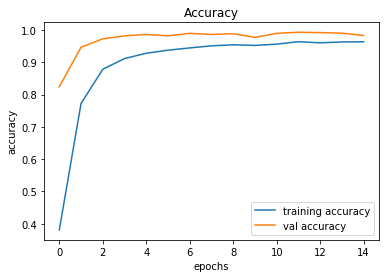

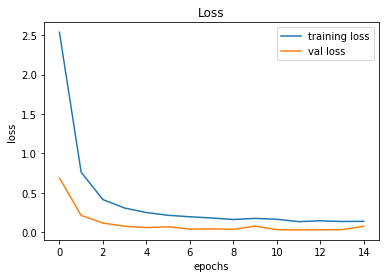

In [9]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [10]:
model.save('traffic_classifier.h5')